In [1]:
#https://github.com/rawanm/DataScientistNanodegree/blob/master/P4_WriteBlogPost/uk_traffic_accidents_data_analysis.ipynb
#https://omdena.com/blog/advanced-eda/
#https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Machine_Learning_UK_Road_Safety_Traffic_Accidents_and_Vehicles.ipynb
#https://www.kaggle.com/code/arielyaakobi10/accident-severity-classification-shirley-ariel
#https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Visualizations_and_Solution_UK_Road_Safety_Traffic_Accidents_and_Vehicles.ipynb

In [2]:
#https://onezero.blog/generate-publication-ready-plots-using-seaborn-library-part-1/

In [3]:
#for blog
#https://medium.com/analytics-vidhya/visualising-uk-road-traffic-accidents-data-with-tableau-48ae78485807

### Exploratory Data Analysis (Matplotlib, Seaborn, Pandas)

In [7]:
import sys

sys.path
sys.executable

'C:\\Users\\Manali\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [8]:
import pandas as pd
import numpy as np
import warnings
import plotly.graph_objs as go
import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import chart_studio.plotly as py
from plotly import tools
from sklearn.preprocessing import LabelEncoder,StandardScaler

import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot

bupu = cl.scales['9']['seq']['BuPu']
HTML( cl.to_html(bupu))

warnings.filterwarnings("ignore") 

### 1. Loading the data

In [9]:
UK_acc_data0521 = pd.read_csv("data/acc_data_0521.csv")

In [10]:
UK_acc_data0521.head()

,accident_index,first_road_class,first_road_number,second_road_class,second_road_number,accident_severity,carriageway_hazards,day_of_week,junction_control,junction_detail,...,speed_limit,time,urban_or_rural_area,weather_conditions,accident_year,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,did_police_officer_attend_scene_of_accident,month,date
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,Tuesday,Data missing or out of range,Not at junction or within 20 metres,...,30.0,17:42,Urban,Raining no high winds,2005,None within 0 meteres,Zebra,yes,January,2005-01-04
1,200501BS00002,B,450.0,C,0.0,Slight,None,Wednesday,Auto traffic signal,Crossroads,...,30.0,17:36,Urban,Fine no high winds,2005,None within 0 meteres,Pedestrian phase at traffic signal junction,yes,January,2005-01-05
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,Thursday,Data missing or out of range,Not at junction or within 20 metres,...,30.0,00:15,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-06
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,Friday,Data missing or out of range,Not at junction or within 20 metres,...,30.0,10:35,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-07
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,Monday,Data missing or out of range,Not at junction or within 20 metres,...,30.0,21:13,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-10


In [11]:
UK_acc_data0521.shape

(2479713, 34)

### 2. Describe the data

In [15]:
UK_acc_data0521.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479713 entries, 0 to 2479712
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   first_road_class                             object 
 2   first_road_number                            float64
 3   second_road_class                            object 
 4   second_road_number                           float64
 5   accident_severity                            object 
 6   carriageway_hazards                          object 
 7   day_of_week                                  object 
 8   junction_control                             object 
 9   junction_detail                              object 
 10  latitude                                     float64
 11  light_conditions                             object 
 12  local_authority_district                     object 
 13  local_author

In [16]:
UK_acc_data0521.describe()

,first_road_number,second_road_number,latitude,location_easting_osgr,location_northing_osgr,longitude,number_of_casualties,number_of_vehicles,speed_limit,accident_year
count,2.479711e+06,2.462120e+06,2.479425e+06,2.479435e+06,2.479435e+06,2.479424e+06,2.479713e+06,2.479713e+06,2.479676e+06,2.479713e+06
mean,9.552546e+02,3.464367e+02,5.252970e+01,4.435777e+05,2.935534e+05,-1.378870e+00,1.335975e+00,1.835012e+00,3.844907e+01,2.012071e+03
std,1.772917e+03,1.233741e+03,1.430217e+00,9.539760e+04,1.588184e+05,1.401192e+00,8.027043e-01,7.123236e-01,1.415726e+01,4.822843e+00
min,0.000000e+00,-1.000000e+00,4.991236e+01,6.408400e+04,1.023500e+04,-7.525273e+00,1.000000e+00,1.000000e+00,-1.000000e+00,2.005000e+03
25%,0.000000e+00,0.000000e+00,5.148112e+01,3.809100e+05,1.772100e+05,-2.287244e+00,1.000000e+00,1.000000e+00,3.000000e+01,2.008000e+03
50%,9.300000e+01,0.000000e+00,5.216879e+01,4.459100e+05,2.537500e+05,-1.319392e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.012000e+03
75%,6.730000e+02,0.000000e+00,5.343829e+01,5.255810e+05,3.937690e+05,-1.901760e-01,1.000000e+00,2.000000e+00,5.000000e+01,2.016000e+03
max,9.999000e+03,9.999000e+03,6.076372e+01,6.555400e+05,1.209512e+06,1.762010e+00,9.300000e+01,6.700000e+01,7.000000e+01,2.021000e+03


In [17]:
UK_acc_data0521.columns

Index(['accident_index', 'first_road_class', 'first_road_number',
       'second_road_class', 'second_road_number', 'accident_severity',
       'carriageway_hazards', 'day_of_week', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'local_authority_highway',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'lsoa_of_accident_location', 'number_of_casualties',
       'number_of_vehicles', 'police_force', 'road_surface_conditions',
       'road_type', 'special_conditions_at_site', 'speed_limit', 'time',
       'urban_or_rural_area', 'weather_conditions', 'accident_year',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities',
       'did_police_officer_attend_scene_of_accident', 'month', 'date'],
      dtype='object')

### 3. Check for missing Values

In [18]:
UK_acc_data0521.isnull().sum()

accident_index                                      0
first_road_class                                    0
first_road_number                                   2
second_road_class                              844272
second_road_number                              17593
accident_severity                                   0
carriageway_hazards                                 0
day_of_week                                         0
junction_control                                    0
junction_detail                                     0
latitude                                          288
light_conditions                                    0
local_authority_district                            0
local_authority_highway                             0
location_easting_osgr                             278
location_northing_osgr                            278
longitude                                         289
lsoa_of_accident_location                      144953
number_of_casualties        

Observation : There are nearly 16 columns who have missing values. 

In [19]:
#simply deleting two columns i.e. second_road_class, second road number and lsoa_of_accident_location because the missing values are too much to clean.
UK_acc_data0521.drop(["lsoa_of_accident_location", "second_road_class","second_road_number"], axis=1, inplace=True)

Now, other missing columns values are replaced by the most coomon categorical values

In [20]:
# filling with most common class
clean_uk_data0521 = UK_acc_data0521.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [21]:
clean_uk_data0521.head()

,accident_index,first_road_class,first_road_number,accident_severity,carriageway_hazards,day_of_week,junction_control,junction_detail,latitude,light_conditions,...,speed_limit,time,urban_or_rural_area,weather_conditions,accident_year,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,did_police_officer_attend_scene_of_accident,month,date
0,200501BS00001,A,3218.0,Serious,None,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,...,30.0,17:42,Urban,Raining no high winds,2005,None within 0 meteres,Zebra,yes,January,2005-01-04
1,200501BS00002,B,450.0,Slight,None,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,30.0,17:36,Urban,Fine no high winds,2005,None within 0 meteres,Pedestrian phase at traffic signal junction,yes,January,2005-01-05
2,200501BS00003,C,0.0,Slight,None,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,...,30.0,00:15,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-06
3,200501BS00004,A,3220.0,Slight,None,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,...,30.0,10:35,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-07
4,200501BS00005,Unclassified,0.0,Slight,None,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,...,30.0,21:13,Urban,Fine no high winds,2005,None within 0 meteres,No physical crossing facilities within 50 metres,yes,January,2005-01-10


In [22]:
clean_uk_data0521.shape

(2479713, 31)

In [23]:
#checking for missing values again
clean_uk_data0521.isnull().sum()

accident_index                                 0
first_road_class                               0
first_road_number                              0
accident_severity                              0
carriageway_hazards                            0
day_of_week                                    0
junction_control                               0
junction_detail                                0
latitude                                       0
light_conditions                               0
local_authority_district                       0
local_authority_highway                        0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
number_of_casualties                           0
number_of_vehicles                             0
police_force                                   0
road_surface_conditions                        0
road_type                                      0
special_conditions_a

Yay!!! Here we go........... I must agree clean data makes me happy

## saving the cleaned data

In [24]:
clean_uk_data0521.to_csv("data/clean_uk_data0521.csv", index= False)

## 4. Data Visualization

In [41]:
#clean_uk_data0521['local_authority_district'].value_counts()

Text(0.5, 1.0, 'local_authority_highway')

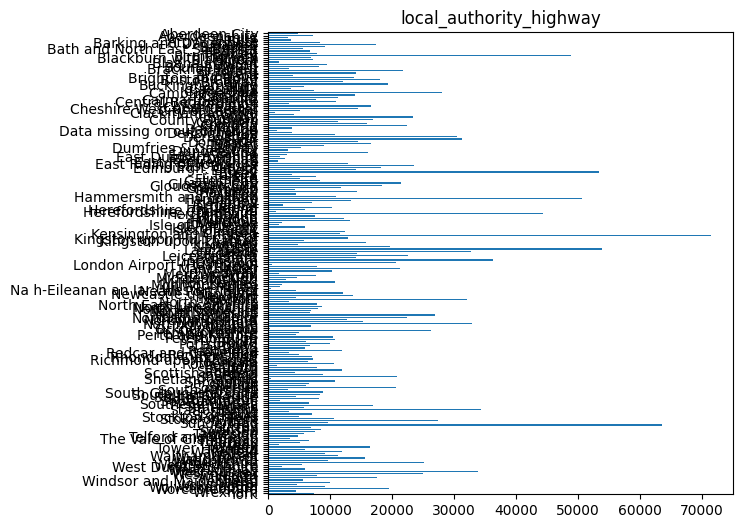

In [42]:
plt.figure(figsize=(6,6))
clean_uk_data0521['local_authority_highway'].value_counts().sort_index(ascending=False).plot(kind='barh')
#plt.title('local_authority_highway')

In [43]:
#clean_uk_data0521['local_authority_highway'].value_counts()

Kent                                    71445
Surrey                                  63567
Lancashire                              53858
Essex                                   53449
Hampshire                               50719
                                        ...  
London Airport (Heathrow)                 616
Na h-Eileanan an Iar (Western Isles)      533
Shetland Islands                          453
Orkney Islands                            381
Isles of Scilly                            26
Name: local_authority_highway, Length: 210, dtype: int64

In [ ]:
#clean_uk_data0521['number_of_vehicles'].value_counts()

In [ ]:
#clean_uk_data0521['number_of_casualties'].value_counts()

In [ ]:
#clean_uk_data0521['police_force'].value_counts()

Text(0.5, 1.0, 'police_force')

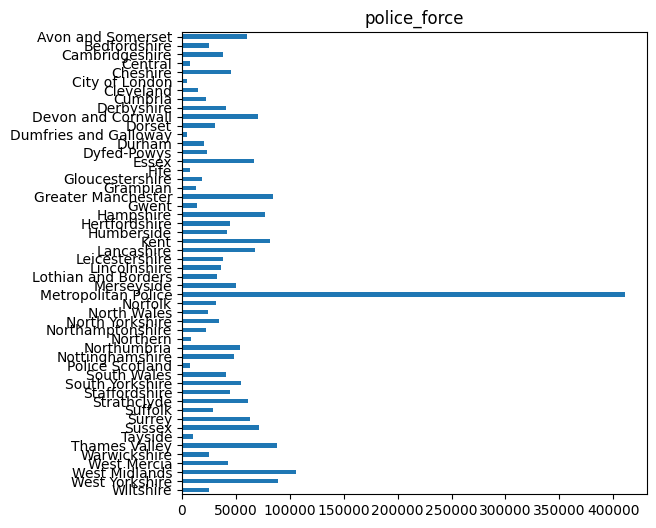

In [44]:
plt.figure(figsize=(6,6))
clean_uk_data0521['police_force'].value_counts().sort_index(ascending=False).plot(kind='barh')
#plt.title('police_force')

In [45]:
#clean_uk_data0521['road_surface_conditions'].value_counts()

In [47]:
# clean_uk_data0521['road_type'].value_counts()

In [49]:
#clean_uk_data0521['special_conditions_at_site'].value_counts()

In [51]:
#clean_uk_data0521['speed_limit'].value_counts()

In [53]:
#clean_uk_data0521['time'].value_counts()

In [59]:
clean_uk_data0521['accident_year'].value_counts()

2005    198735
2006    189161
2007    182115
2008    170591
2009    163554
2010    154414
2011    151474
2014    146322
2012    145571
2015    140056
2013    138660
2016    136621
2017    129982
2018    122635
2019    117536
2021    101087
2020     91199
Name: accident_year, dtype: int64

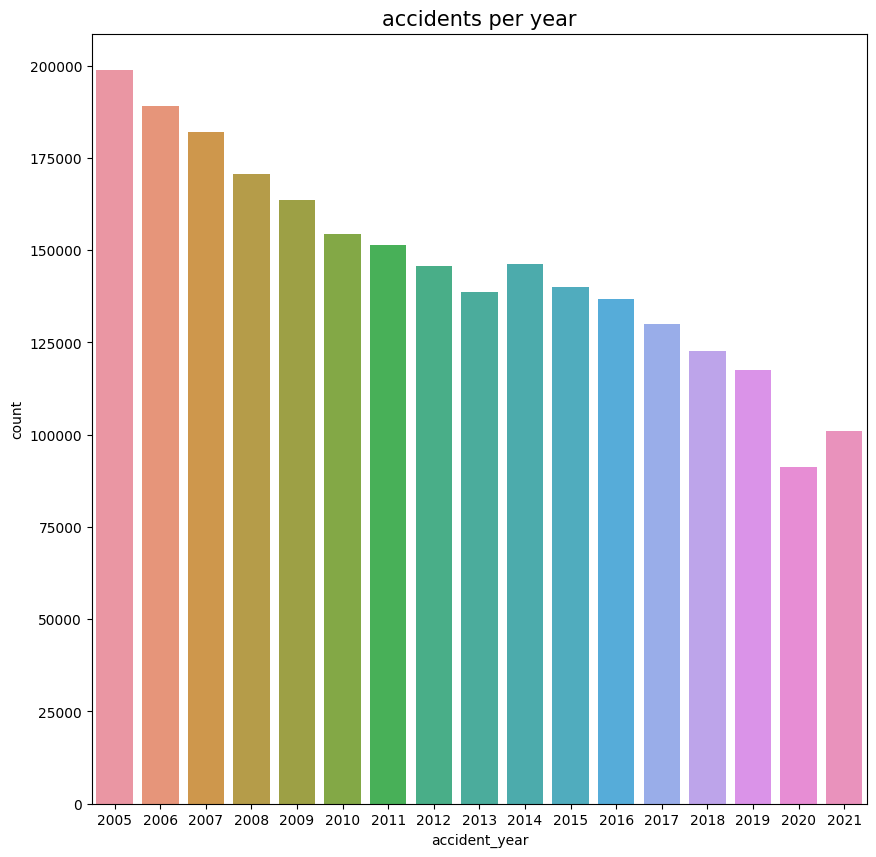

In [104]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = "accident_year" , data= clean_uk_data0521)
ax.set_title('accidents per year', size = 15)
plt.savefig('accident_year.png')

### Observation : 
a/c to accident years from 2005 to 2021, there is a tremendous downfall of accident cases. It is good thing.

In [61]:
clean_uk_data0521["pedestrian_crossing_human_control"].value_counts()

None within 0 meteres                 2443042
Unknown                                 13647
Control by other authorised Person      12677
Control by School crossing Patrol        6773
Data Missing or out of range             3574
Name: pedestrian_crossing_human_control, dtype: int64

Text(0.5, 1.0, 'pedestrian_crossing_human_control')

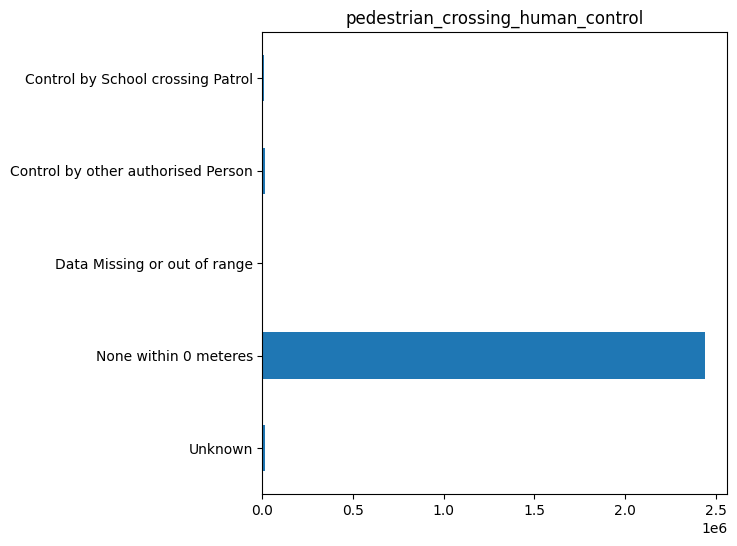

In [62]:
plt.figure(figsize=(6,6))
clean_uk_data0521['pedestrian_crossing_human_control'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('pedestrian_crossing_human_control')

In [63]:
clean_uk_data0521["pedestrian_crossing_physical_facilities"].value_counts()

No physical crossing facilities within 50 metres                             2026524
Pedestrian phase at traffic signal junction                                   172962
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     133812
Zebra                                                                          73463
Central refuge                                                                 50219
unknown (self reported)                                                        11974
Footbridge or subway                                                            6585
Data missing or out of range                                                    4174
Name: pedestrian_crossing_physical_facilities, dtype: int64

Text(0.5, 1.0, 'pedestrian_crossing_physical_facilities')

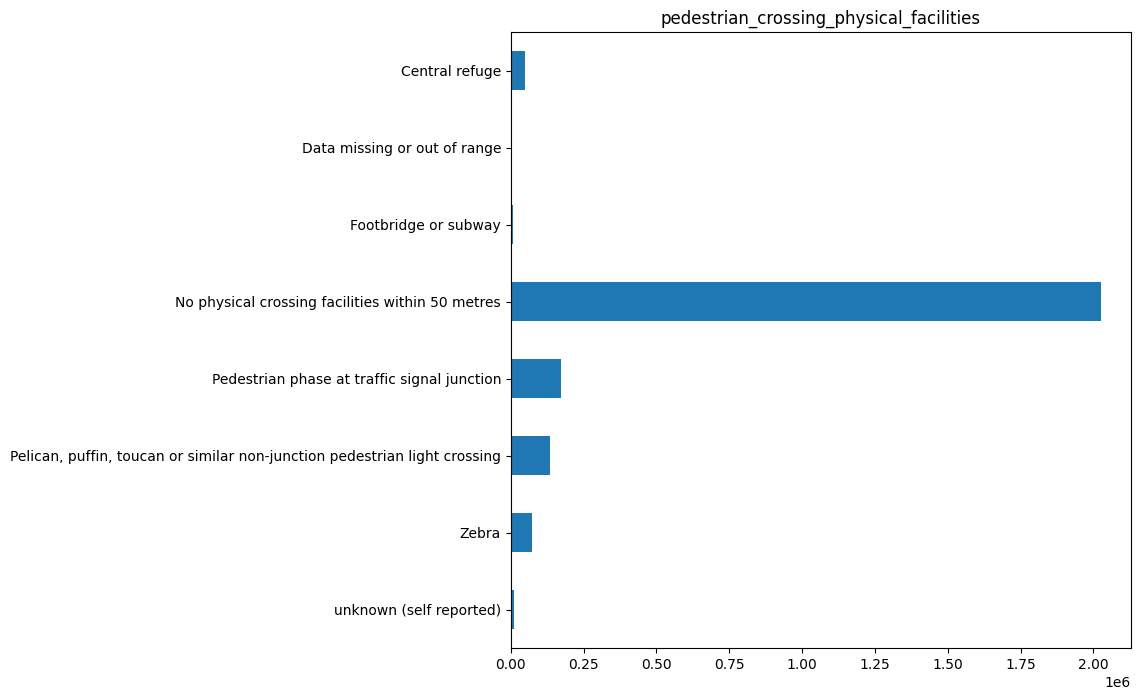

In [64]:
plt.figure(figsize=(8,8))
clean_uk_data0521['pedestrian_crossing_physical_facilities'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('pedestrian_crossing_physical_facilities')

In [66]:
clean_uk_data0521["month"].value_counts()

November     225310
October      222412
July         217669
September    215211
June         210466
May          209783
August       204055
December     201740
January      201448
March        196532
April        190614
February     184473
Name: month, dtype: int64

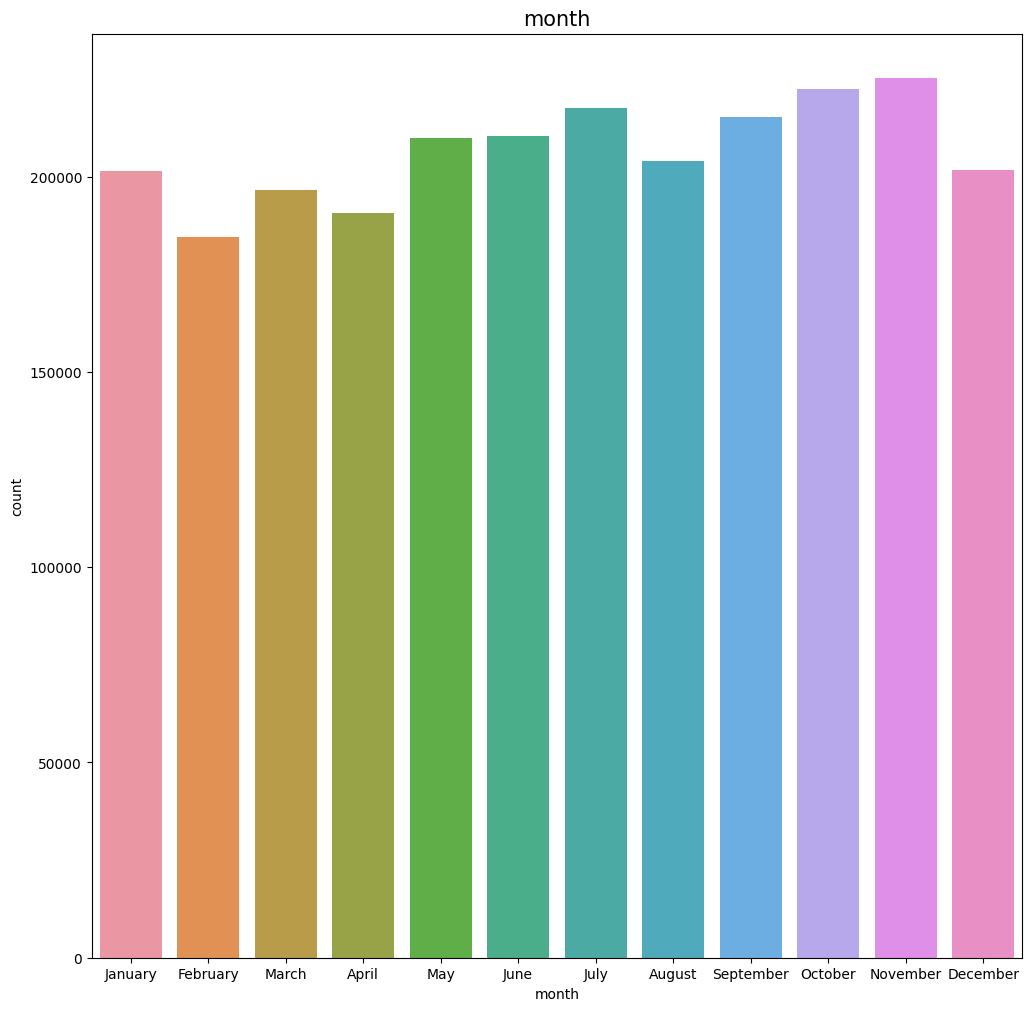

In [105]:
plt.figure(figsize=(12,12))
ax = sns.countplot(x = "month" , data= clean_uk_data0521)
ax.set_title('month', size = 15)
plt.savefig('month.png')

## Obsevarvation :
November is the month where mos accidents had happend. and February is the month where least accidents had happend.

## 5. Severity of accidents over 16 years (2005 - 2021)

In [68]:
x = clean_uk_data0521.accident_severity.groupby([clean_uk_data0521.accident_year]).count().index

In [69]:
trace_1 = go.Bar(
            x=x,
            y=clean_uk_data0521[clean_uk_data0521.accident_severity == 'Slight'].accident_severity.groupby([clean_uk_data0521.accident_year]).count(),
            name='Slight', marker=dict(color=bupu[3]))

trace_2 = go.Bar(
            x=x,
            y=clean_uk_data0521[clean_uk_data0521.accident_severity == 'Serious'].accident_severity.groupby([clean_uk_data0521.accident_year]).count(),
            name='Serious', marker=dict(color=bupu[4]))

trace_3 = go.Bar(
            x=x,
            y=clean_uk_data0521[clean_uk_data0521.accident_severity == 'Fatal'].accident_severity.groupby([clean_uk_data0521.accident_year]).count(),
            name='Fatal', marker=dict(color=bupu[8]))

In [70]:
trace_4 = go.Scatter(
    x = x,
    y = clean_uk_data0521.accident_severity.groupby([clean_uk_data0521.accident_year]).count(), 
    name = 'Total Accidents per year',  mode = 'lines', legendgroup= 'group2', 
    marker=dict(color=bupu[6]))

In [71]:
layout = go.Layout(title="Accidents Severity Per Year", 
                        barmode='group', 
                        xaxis = dict(ticks='', nticks=24, 
                                    title=go.layout.xaxis.Title(
                                    text='Accidents Year')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Total Count')))

fig = go.Figure(data=[trace_1, trace_2, trace_3, trace_4], layout=layout)
fig.iplot( filename='Accidents_Severity_Per_Year')

### Observation : 
Above we can se is the graph of Accident severity from 2005 to 2021 where Slight severity if the most frequent one through 
all years. Accident count is decreasing until 2013 then there is spike in 2014. 2020 is the year where minimum acccidents 
happend in all 16 years.


## 6. Accidents Data Month when most accidents happen 

In [72]:
accidents_month = clean_uk_data0521.groupby('date')['month'].count().reset_index()
accidents_month = accidents_month.set_index('date')
#accidents_month = accidents_month['month'].resample('MS').sum()

In [73]:
accidents_month_fatal = clean_uk_data0521[clean_uk_data0521.accident_severity == 'Fatal'].groupby('date')['month'].count().reset_index()
accidents_month_fatal = accidents_month_fatal.set_index('date')

In [74]:
accidents_month_serious = clean_uk_data0521[clean_uk_data0521.accident_severity == 'Serious'].groupby('date')['month'].count().reset_index()
accidents_month_serious = accidents_month_serious.set_index('date')

In [75]:
accidents_month_slight = clean_uk_data0521[clean_uk_data0521.accident_severity == 'Slight '].groupby('date')['month'].count().reset_index()
accidents_month_slight  = accidents_month_slight.set_index('date')

In [76]:
trace_1 = go.Scatter(x=accidents_month_fatal.index, 
                     y=accidents_month_fatal, 
                     name='Fatal', 
                     mode='lines',
                    marker=dict(
                    color=bupu[4]))

In [77]:
trace_2 = go.Scatter(x=accidents_month_serious.index, 
                     y=accidents_month_serious, 
                     name='serious', 
                     mode='lines',
                    marker=dict(
                    color=bupu[4]))

In [78]:
trace_3 = go.Scatter(x=accidents_month_slight.index, 
                     y=accidents_month_slight, 
                     name='Slight', 
                     mode='lines',
                    marker=dict(
                    color=bupu[4]))

In [79]:
trace_4 = go.Scatter(x=accidents_month.index, 
                     y=accidents_month, 
                     name='Total', 
                     mode='lines+markers',
                    marker=dict(
                    color=bupu[7]))

In [80]:
layout = go.Layout(title="Accidents Per Months", 
                        barmode='overlay', 
                        xaxis = dict(ticks='', nticks=48, 
                                    title=go.layout.xaxis.Title(
                                    text='Date')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count')))

In [81]:
fig = go.Figure(data=[trace_1,trace_2, trace_3, trace_4], layout=layout)
fig.iplot(fig, filename='Accidents_Per_Months')

## 7. Day and Time when most accidents happen 

In [82]:
# accident_table_heat: 

accident_table_heat = clean_uk_data0521.time.groupby([clean_uk_data0521.day_of_week, clean_uk_data0521.time]).count()
accident_table_heat = accident_table_heat.rename_axis(['Time', 'Day_of_Week']).unstack('Day_of_Week')
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_table_heat = accident_table_heat.reindex(day_of_week)

In [83]:
color_scale = [[0.0, 'rgb(247,252,253)'], 
               [0.1111111111111111, 'rgb(224,236,244)'], 
               [0.2222222222222222, 'rgb(224,236,244)'], 
               [0.3333333333333333, 'rgb(191,211,230)'], 
               [0.4444444444444444, 'rgb(158,188,218)'], 
               [0.5555555555555556, 'rgb(140,150,198)'], 
               [0.6666666666666666, 'rgb(140,107,177)'], 
               [0.7777777777777778, 'rgb(136,65,157)'], 
               [0.8888888888888888, 'rgb(129,15,124)'], 
               [0.9999999999999999, 'rgb(69,117,180)'], 
               [1.0, 'rgb(77,0,75)']]

In [84]:
data = [go.Heatmap(
        z=accident_table_heat,
        x=accident_table_heat.columns,
        y=accident_table_heat.index,
        colorscale= color_scale)]

In [85]:
layout = go.Layout(
    title='Accidents Per Day/Hour',
    xaxis = dict(ticks='', nticks=36, title='Hour (24)'),
    yaxis = dict(ticks='', title='Day')
)_

In [86]:
fig = go.Figure(data=data, layout=layout)
fig.iplot(filename='Accidents Per Day-Hour')

### Observation :
08.00 to 08:40 AM is the morning rush hour time and 16.00 to 18.00 PM is the evening rush times are the paricular times accidents happend from monday to friday. It is opposite of weekends, Saturday and sunday have the least count.

### Correlation between features

In [ ]:
## 1. Accidents by speed 

In [87]:
accidents_by_speed = clean_uk_data0521.speed_limit.groupby([clean_uk_data0521.speed_limit]).count().sort_index()
trace_1 = go.Bar(
            x=accidents_by_speed.index,
            y=accidents_by_speed, 
            name= 'Speed Limit', 
            marker=dict(
             color = bupu[1:]))

In [88]:
## 2.  accidents_by_Road_Type:  
accidents_by_road = clean_uk_data0521.road_type.groupby([clean_uk_data0521.road_type]).count().sort_values()
trace_2 = go.Bar(
            x=accidents_by_road.index,
            y=accidents_by_road,
            name= 'Road Type', 
            marker=dict(
             color = bupu[1:]))

In [89]:
## 3. accidents_by_urban:  
accidents_by_urban = clean_uk_data0521.urban_or_rural_area.groupby([clean_uk_data0521.urban_or_rural_area]).count().sort_values()
trace_3 = go.Bar(
            x=accidents_by_urban.index,
            y=accidents_by_urban, 
            name= 'Urban or Rural_Area', 
            marker=dict(
             color = bupu[1:]))

In [90]:
# accidents_by_surface:  
accidents_by_surface = clean_uk_data0521.road_surface_conditions.groupby([clean_uk_data0521.road_surface_conditions]).count().sort_values()
trace_4 = go.Bar(
            x=accidents_by_surface.index,
            y=accidents_by_surface,
            name='Road Surface Conditions', 
            marker=dict(
             color = bupu[1:]))


In [91]:
# accidents_by_weather:  
accidents_by_weather = clean_uk_data0521.weather_conditions.groupby([clean_uk_data0521.weather_conditions]).count().sort_values()
trace_5 = go.Bar(
            x=accidents_by_weather.index,
            y=accidents_by_weather, 
            name= 'Weather Conditions', 
            marker=dict(
             color = bupu[1:]))

In [92]:
# accidents_by_condition:  
accidents_by_special = clean_uk_data0521.special_conditions_at_site.groupby([clean_uk_data0521.special_conditions_at_site]).count().sort_values()
trace_6 = go.Bar(
            x=accidents_by_special.index,
            y=accidents_by_special, 
            name = 'Special Conditions at Site', 
            marker=dict(
             color = bupu[1:]))


In [93]:
# accidents_by_junction:  
accidents_by_junction = clean_uk_data0521.junction_detail.groupby([clean_uk_data0521.junction_detail]).count().sort_values()
trace_7 = go.Bar(
            x=accidents_by_junction.index,
            y=accidents_by_junction, 
            name= 'Junction Detail', 
            marker=dict(
             color = bupu[1:]))

In [94]:
# accidents_by_light:  
accidents_by_light = clean_uk_data0521.light_conditions.groupby([clean_uk_data0521.light_conditions]).count().sort_values()
trace_8 = go.Bar(
            x=accidents_by_light.index,
            y=accidents_by_light, 
            name= 'Light Conditions', 
            marker=dict(
             color = bupu[1:]))

In [111]:
# first road class 
accidents_by_road_class = clean_uk_data0521.first_road_class.groupby([clean_uk_data0521.first_road_class]).count().sort_values()
trace_9 = go.Bar(
            x=accidents_by_road_class.index,
            y=accidents_by_road_class, 
            name= 'First Road Class', 
            marker=dict(
             color = bupu[1:]))

In [112]:
# first road class 
accidents_by_cariageway = clean_uk_data0521.carriageway_hazards.groupby([clean_uk_data0521.carriageway_hazards]).count().sort_values()
trace_10 = go.Bar(
            x=accidents_by_cariageway.index,
            y=accidents_by_cariageway, 
            name= 'Carriageway Hazards', 
            marker=dict(
             color = bupu[1:]))

In [113]:
# Junction control
accidents_by_control = clean_uk_data0521.junction_control.groupby([clean_uk_data0521.junction_control]).count().sort_values()
trace_11 = go.Bar(
            x=accidents_by_control.index,
            y=accidents_by_control, 
            name= 'Junction Control', 
            marker=dict(
             color = bupu[1:]))

In [114]:
# did police officer attend
accidents_by_police = clean_uk_data0521.did_police_officer_attend_scene_of_accident.groupby([clean_uk_data0521.did_police_officer_attend_scene_of_accident]).count().sort_values()
trace_12 = go.Bar(
            x=accidents_by_police.index,
            y=accidents_by_police, 
            name= 'Did Police Officier attend scene of accident', 
            marker=dict(
             color = bupu[1:]))

In [95]:
subplot_titles = ('Speed Limit', 'Road Type','Urban or Rural_Area', 'Road Surface Conditions')
fig = tools.make_subplots(rows=1, cols=4, subplot_titles=subplot_titles)

In [96]:
fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)
fig.append_trace(trace_4, 1, 4)

In [97]:
layout = go.Layout(
    title='Accidents Characteristics',
    xaxis = dict(ticks='', nticks=36, automargin=True),
    yaxis = dict(ticks='', automargin=True), 
    font=dict(size=10), showlegend=False
)

In [98]:
fig['layout'].update(layout)
fig.iplot(fig, filename='Accidents Characteristics_1')

In [99]:
subplot_titles = ('Weather Conditions', 'Special Conditions at Site','Junction Detail', 'Light Conditions')
fig = tools.make_subplots(rows=1, cols=4, subplot_titles=subplot_titles)

In [100]:
fig.append_trace(trace_5, 1, 1)
fig.append_trace(trace_6, 1, 2)
fig.append_trace(trace_7, 1, 3)
fig.append_trace(trace_8, 1, 4)

In [101]:
layout = go.Layout(
    title='Accidents Characteristics',
    xaxis = dict(ticks='', nticks=36, automargin=True),
    yaxis = dict(ticks='', automargin=True), 
    font=dict(size=10), showlegend=False
)

In [102]:
fig['layout'].update(layout)
fig.iplot(fig, filename='Accidents Characteristics_2')

In [109]:
subplot_titles = ('First Road Class', 'Carriageway Hazards','Junction Control', 'Did Police Officier attend scene of accident')
fig = tools.make_subplots(rows=1, cols=4, subplot_titles=subplot_titles)

In [115]:
fig.append_trace(trace_9, 1, 1)
fig.append_trace(trace_10, 1, 2)
fig.append_trace(trace_11, 1, 3)
fig.append_trace(trace_12, 1, 4)

In [116]:
layout = go.Layout(
    title='Accidents Characteristics',
    xaxis = dict(ticks='', nticks=36, automargin=True),
    yaxis = dict(ticks='', automargin=True), 
    font=dict(size=10), showlegend=False
)

In [117]:
fig['layout'].update(layout)
fig.iplot(fig, filename='Accidents Characteristics_3')

## Heatmap 

<Axes: >

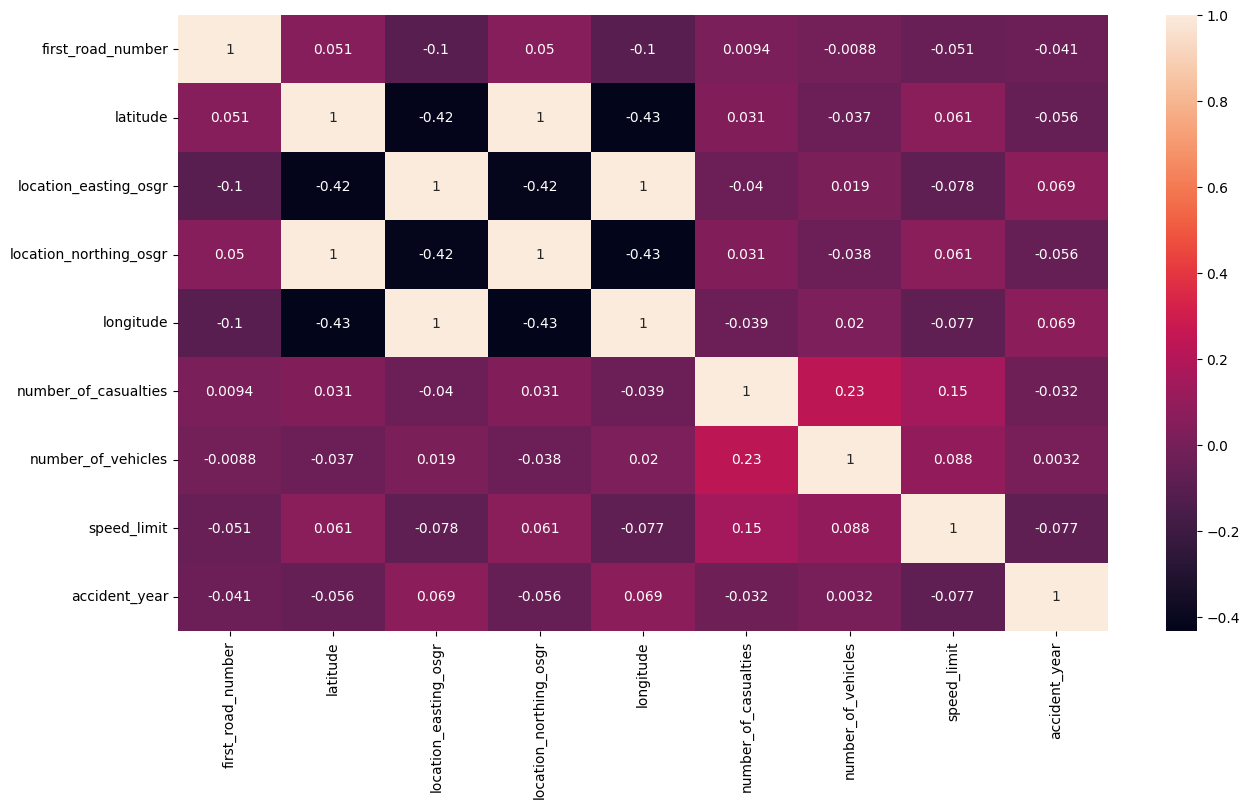

In [123]:
plt.figure(figsize = (15,8))
sns.heatmap(clean_uk_data0521.corr(), annot=True)